# Expplore Rank Change for Fidelities 

In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [2]:
databse_name = "fehring_growing_nn_new"
table_name = "net2deeper"

In [3]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-29 15:38:21,929  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-29 15:38:21,929  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-29 15:38:21,929  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-29 15:38:21,929  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-29 15:38:21,930  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-29 15:38:21,930  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-29 15:38:21,930  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-29 15:38:21,930  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-29 15:38:21,931  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-29 15:38:21,931  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-29 15:38:22,150  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-29 15:38:22,229  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-29 15:38:22,229  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-29 15:38:22,230  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-29 15:38:22,230  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-29 15:38:22,230  | py-experimenter - INFO     | Closing all open connections...
2024-07-29 15:38:22,231  | py-experimenter - WARNING  | Tunnels are not started. Please .start() first!
2024-07-29 15:38:22,231  | py-experimenter - INFO     | Cl

In [4]:
smac_costs.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-07-26 15:48:31,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9948
1,2,1,2024-07-26 15:54:17,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9456
2,3,1,2024-07-26 16:00:57,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9262
3,4,1,2024-07-26 16:18:33,4,1,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.8412
4,5,1,2024-07-26 16:37:45,5,1,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.3516


In [5]:
# Disregard configs with a budget = 4]
smac_costs.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
0,1,1,2024-07-26 15:48:31,1,1,"{'batch_size': 64, 'ent_coef': 0.1861694086343...",0.9948
1,2,1,2024-07-26 15:54:17,2,1,"{'batch_size': 256, 'ent_coef': 0.074653743579...",0.9456
2,3,1,2024-07-26 16:00:57,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9262
3,4,1,2024-07-26 16:18:33,4,1,"{'batch_size': 32, 'ent_coef': 0.1324634098447...",1.8412
4,5,1,2024-07-26 16:37:45,5,1,"{'batch_size': 32, 'ent_coef': 0.2976173403672...",1.3516


In [6]:
# Extract all hyperparameter_str_identifier where budget is 3
highest_fidelity_data = smac_costs[smac_costs["budget"] == 4]
hyperparameter_str_identifier = highest_fidelity_data["hyperparameter_str_identifier"].tolist()
hyperparameter_str_identifier

["{'batch_size': 64, 'ent_coef': 0.021257422305643557, 'learning_rate': 0.0006522516419619164, 'n_epochs': 6}",
 "{'batch_size': 128, 'ent_coef': 0.10853819875046611, 'learning_rate': 0.0002575956625820876, 'n_epochs': 10}",
 "{'batch_size': 256, 'ent_coef': 0.12993385260924697, 'learning_rate': 0.0008005707302057775, 'n_epochs': 20}",
 "{'batch_size': 128, 'ent_coef': 0.24418993229046462, 'learning_rate': 0.000359540749938963, 'n_epochs': 12}",
 "{'batch_size': 128, 'ent_coef': 0.015471292271425916, 'learning_rate': 0.00932356291171406, 'n_epochs': 7}",
 "{'batch_size': 128, 'ent_coef': 0.007647100362587385, 'learning_rate': 0.008544479948909542, 'n_epochs': 7}",
 "{'batch_size': 128, 'ent_coef': 0.01840214633587566, 'learning_rate': 0.00889265482529654, 'n_epochs': 5}",
 "{'batch_size': 128, 'ent_coef': 0.018046155098733495, 'learning_rate': 0.009118927505067915, 'n_epochs': 7}",
 "{'batch_size': 32, 'ent_coef': 0.0005309372850206717, 'learning_rate': 0.00020422562780736536, 'n_epoch

In [7]:
# Select only the data with the hyperparameter_str_identifier
smac_costs = smac_costs[smac_costs["hyperparameter_str_identifier"].isin(hyperparameter_str_identifier)]
smac_costs.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost
2,3,1,2024-07-26 16:00:57,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9262
5,6,1,2024-07-26 16:43:48,6,1,"{'batch_size': 128, 'ent_coef': 0.108538198750...",0.6504
7,8,1,2024-07-26 16:56:12,8,1,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.2894
9,10,1,2024-07-26 17:10:54,10,1,"{'batch_size': 256, 'ent_coef': 0.129933852609...",0.5872
10,11,1,2024-07-26 17:17:48,11,2,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.2510


In [8]:
# For each budget rank the configurations by cost
smac_costs["rank"] = smac_costs.groupby("budget")["cost"].rank("dense")
smac_costs

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,cost,rank
2,3,1,2024-07-26 16:00:57,3,1,"{'batch_size': 128, 'ent_coef': 0.244189932290...",0.9262,16.0
5,6,1,2024-07-26 16:43:48,6,1,"{'batch_size': 128, 'ent_coef': 0.108538198750...",0.6504,11.0
7,8,1,2024-07-26 16:56:12,8,1,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.2894,6.0
9,10,1,2024-07-26 17:10:54,10,1,"{'batch_size': 256, 'ent_coef': 0.129933852609...",0.5872,9.0
10,11,1,2024-07-26 17:17:48,11,2,"{'batch_size': 64, 'ent_coef': 0.0212574223056...",0.2510,12.0
...,...,...,...,...,...,...,...,...
125,126,1,2024-07-27 14:14:13,126,3,"{'batch_size': 32, 'ent_coef': 0.0004439980189...",-0.0884,9.0
126,127,1,2024-07-27 14:39:19,127,4,"{'batch_size': 64, 'ent_coef': 0.0002983810699...",-0.3630,5.0
127,128,1,2024-07-27 15:21:41,128,4,"{'batch_size': 32, 'ent_coef': 0.0002215875454...",-0.1638,9.0
128,129,1,2024-07-27 15:37:50,129,4,"{'batch_size': 32, 'ent_coef': 0.0021934929294...",-0.3434,7.0


In [9]:
# Split dataframe into multiple frames, one for each budget
smac_cost_budget_1 = smac_costs[smac_costs["budget"] == 1]
smac_cost_budget_2 = smac_costs[smac_costs["budget"] == 2]
smac_cost_budget_3 = smac_costs[smac_costs["budget"] == 3]
smac_cost_budget_4 = smac_costs[smac_costs["budget"] == 4]

In [10]:
# Order each frame by hyperparameter_str_identifier
smac_cost_budget_1 = smac_cost_budget_1.sort_values("hyperparameter_str_identifier")
smac_cost_budget_2 = smac_cost_budget_2.sort_values("hyperparameter_str_identifier")
smac_cost_budget_3 = smac_cost_budget_3.sort_values("hyperparameter_str_identifier")
smac_cost_budget_4 = smac_cost_budget_4.sort_values("hyperparameter_str_identifier")

# Transform to relative rank
smac_cost_budget_1["rank"] = smac_cost_budget_1["rank"] / smac_cost_budget_1["rank"].max()
smac_cost_budget_2["rank"] = smac_cost_budget_2["rank"] / smac_cost_budget_2["rank"].max()
smac_cost_budget_3["rank"] = smac_cost_budget_3["rank"] / smac_cost_budget_3["rank"].max()
smac_cost_budget_4["rank"] = smac_cost_budget_4["rank"] / smac_cost_budget_4["rank"].max()



In [11]:
# Merge the dataframes
smac_costs = pd.concat([smac_cost_budget_1, smac_cost_budget_2, smac_cost_budget_3, smac_cost_budget_4])

([<matplotlib.axis.XTick at 0x7b3058bc5370>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

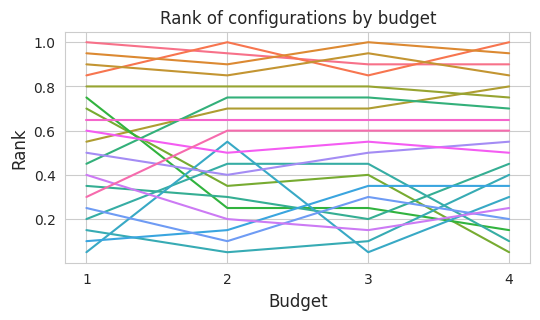

In [12]:
sns.lineplot(data=smac_costs, x="budget", y="rank", hue="hyperparameter_str_identifier")
# Remove legend
plt.legend([],[], frameon=False)
plt.xlabel("Budget")
plt.ylabel("Rank")
plt.title("Rank of configurations by budget")
# Set x ticks
plt.xticks([1, 2, 3,4])

# Calcualte Spearmans rank correlation

In [13]:
smac_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_table = smac_table[smac_table["budget"] == 4]

2024-07-29 15:38:22,708  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-29 15:38:22,709  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-29 15:38:22,710  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-29 15:38:22,710  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-29 15:38:22,710  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-29 15:38:22,711  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-29 15:38:22,711  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-29 15:38:22,711  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-29 15:38:22,712  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-29 15:38:22,712  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-29 15:38:22,931  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-29 15:38:23,010  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-29 15:38:23,010  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-29 15:38:23,010  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-29 15:38:23,010  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-29 15:38:23,011  | py-experimenter - INFO     | Closing all open connections...
2024-07-29 15:38:23,011  | py-experimenter - WARNING  | Tunnels are not started. Please .start() first!
2024-07-29 15:38:23,011  | py-experimenter - INFO     | Cl

# Same plot with uncertainty due to using final evaluation callback

In [14]:
final_evaluations = get_logtable(databse_name, table_name, "final_evaluation_callback", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-29 15:38:23,215  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-29 15:38:23,216  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-29 15:38:23,216  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-29 15:38:23,216  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-29 15:38:23,217  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-29 15:38:23,217  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-29 15:38:23,217  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-29 15:38:23,218  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-29 15:38:23,218  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-29 15:38:23,218  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-29 15:38:23,288  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-29 15:38:23,439  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-29 15:38:23,517  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-29 15:38:23,517  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-29 15:38:23,518  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-29 15:38:23,518  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-29 15:38:23,518  | py-experimenter - INFO     | Closing all open connections...
2024-07-29 15:38:23,519  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [15]:
final_evaluations.head()

,ID,experiment_id,timestamp,trial_number,budget,hyperparameter_str_identifier,worker_number,final_score,final_std,episode_lengths,average_episode_lengths,successfull,dead,time_out,end_states,rewards_per_episode,actions_per_episode
0,1,1,2024-07-26 15:48:15,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",1,-1.081,1.12099,"3,200,200,200,200,200,200,200,200,200",180.3,0.1,0.0,0.9,"Success,TimeOut,TimeOut,TimeOut,TimeOut,TimeOu...","[[0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, -0...","{0: [[7, 6, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5..."
1,2,1,2024-07-26 15:48:18,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",2,-0.677,1.07319,"1,200,200,200,200,200,200,200,200,200",180.1,0.1,0.0,0.9,"Success,TimeOut,TimeOut,TimeOut,TimeOut,TimeOu...","[[1.0], [0.0, 0.0, -0.01, -0.01, -0.01, -0.01,...","{0: [[2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6..."
2,3,1,2024-07-26 15:48:18,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",3,-1.257,1.07306,"1,200,200,200,200,200,200,200,200,200",180.1,0.1,0.0,0.9,"Success,TimeOut,TimeOut,TimeOut,TimeOut,TimeOu...","[[1.0], [0.0, 0.0, -0.01, -0.01, -0.01, -0.01,...","{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6..."
3,4,1,2024-07-26 15:48:21,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",0,-0.485,1.00279,"2,200,200,200,200,200,200,200,200,200",180.2,0.1,0.0,0.9,"Success,TimeOut,TimeOut,TimeOut,TimeOut,TimeOu...","[[0.0, 1.0], [0.0, 0.0, 0.0, 0.0, -0.01, -0.01...","{0: [[3, 2, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2..."
4,5,1,2024-07-26 15:48:31,0,1,"(64, 0.2, None, 0.186169408634305, 0.95, 0.000...",4,-1.474,1.01214,"3,200,200,200,200,200,200,200,200,200",180.3,0.1,0.0,0.9,"Success,TimeOut,TimeOut,TimeOut,TimeOut,TimeOu...","[[0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0....","{0: [[7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3..."


# Plot performance by Budget

In [16]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-29 15:38:24,001  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-29 15:38:24,001  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-29 15:38:24,001  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-29 15:38:24,002  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-29 15:38:24,072  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-29 15:38:24,220  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-29 15:38:24,297  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-29 15:38:24,297  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-29 15:38:24,298  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-29 15:38:24,298  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-29 15:38:24,298  | py-experimenter - INFO     | Closing all open connections...
2024-07-29 15:38:24,298  | py-experimenter - WARNING  | Tunnels are not started. Please .s

([<matplotlib.axis.XTick at 0x7b30589bda90>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

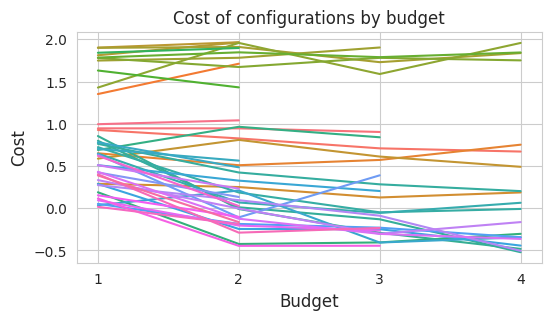

In [17]:
sns.lineplot(data=smac_costs, x="budget", y="cost", hue="hyperparameter_str_identifier")
plt.legend([],[], frameon=False)
plt.xlabel("Budget")
plt.ylabel("Cost")
plt.title("Cost of configurations by budget")
plt.xticks([1, 2, 3,4])